In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rain-data-master-8k/rain_data_mechanical_master.csv
/kaggle/input/rain-data-master-8k/rainfall_sound_8k/2023_12_17_03_11_57_571853.wav
/kaggle/input/rain-data-master-8k/rainfall_sound_8k/2023_12_17_16_16_12_940548.wav
/kaggle/input/rain-data-master-8k/rainfall_sound_8k/2024_05_21_22_30_34_452070.wav
/kaggle/input/rain-data-master-8k/rainfall_sound_8k/2023_12_17_05_02_34_604655.wav
/kaggle/input/rain-data-master-8k/rainfall_sound_8k/2023_12_17_04_56_56_315311.wav
/kaggle/input/rain-data-master-8k/rainfall_sound_8k/2024_01_05_04_08_13_966320.wav
/kaggle/input/rain-data-master-8k/rainfall_sound_8k/2023_12_16_13_18_47_915141.wav
/kaggle/input/rain-data-master-8k/rainfall_sound_8k/2023_12_17_16_52_22_609270.wav
/kaggle/input/rain-data-master-8k/rainfall_sound_8k/2023_12_17_12_35_16_381502.wav
/kaggle/input/rain-data-master-8k/rainfall_sound_8k/2023_12_17_10_02_25_633189.wav
/kaggle/input/rain-data-master-8k/rainfall_sound_8k/2024_05_26_21_54_16_552832.wav
/kaggle/input/rain-da

In [2]:
import pandas as pd

import numpy as np

In [3]:
data = pd.read_csv("/kaggle/input/rain-data-master-8k/rain_data_mechanical_master.csv")
data1 = data.copy()

In [4]:
def convert_to_mm(value):
    if 'µm' in value:
        return float(value.replace('µm',''))/1000

    elif 'mm' in value:
        return float(value.replace('mm',''))
    else:
        return
        


data['rainfall_mm'] = data['device_frmpayload_data_rainfall'].apply(convert_to_mm)

data.head()

,Time,device_frmpayload_data_rainfall,rainfall_mm
0,2023-11-22 18:27:26,800 µm,0.8
1,2023-11-22 18:30:26,1.40 mm,1.4
2,2023-11-22 18:33:26,1 mm,1.0
3,2023-11-22 18:36:26,1.40 mm,1.4
4,2023-11-22 18:39:26,200 µm,0.2


In [5]:
import os
from datetime import datetime,timedelta

data['Time'] = pd.to_datetime(data['Time'])
data.head()

audio_folder = "/kaggle/input/rain-data-master-8k/rainfall_sound_8k"



In [6]:
audio_files = []
for fname in os.listdir(audio_folder):
    if fname.endswith('.wav'):
        try:
            parts = fname.replace('.wav','').split('_')
            time_str = '_'.join(parts[:6])
            audio_time = datetime.strptime(time_str,"%Y_%m_%d_%H_%M_%S")
            audio_files.append((audio_time,os.path.join(audio_folder,fname)))

        except:
            pass

audio_files

[(datetime.datetime(2023, 12, 17, 3, 11, 57),
  '/kaggle/input/rain-data-master-8k/rainfall_sound_8k/2023_12_17_03_11_57_571853.wav'),
 (datetime.datetime(2023, 12, 17, 16, 16, 12),
  '/kaggle/input/rain-data-master-8k/rainfall_sound_8k/2023_12_17_16_16_12_940548.wav'),
 (datetime.datetime(2024, 5, 21, 22, 30, 34),
  '/kaggle/input/rain-data-master-8k/rainfall_sound_8k/2024_05_21_22_30_34_452070.wav'),
 (datetime.datetime(2023, 12, 17, 5, 2, 34),
  '/kaggle/input/rain-data-master-8k/rainfall_sound_8k/2023_12_17_05_02_34_604655.wav'),
 (datetime.datetime(2023, 12, 17, 4, 56, 56),
  '/kaggle/input/rain-data-master-8k/rainfall_sound_8k/2023_12_17_04_56_56_315311.wav'),
 (datetime.datetime(2024, 1, 5, 4, 8, 13),
  '/kaggle/input/rain-data-master-8k/rainfall_sound_8k/2024_01_05_04_08_13_966320.wav'),
 (datetime.datetime(2023, 12, 16, 13, 18, 47),
  '/kaggle/input/rain-data-master-8k/rainfall_sound_8k/2023_12_16_13_18_47_915141.wav'),
 (datetime.datetime(2023, 12, 17, 16, 52, 22),
  '/kaggle

In [7]:
audio_files.sort()

In [8]:
    audio_df = pd.DataFrame(audio_files,columns = ['audio_time','audio_path'])

In [9]:
audio_df.head()

,audio_time,audio_path
0,2023-11-22 18:24:26,/kaggle/input/rain-data-master-8k/rainfall_sou...
1,2023-11-22 18:24:36,/kaggle/input/rain-data-master-8k/rainfall_sou...
2,2023-11-22 18:24:46,/kaggle/input/rain-data-master-8k/rainfall_sou...
3,2023-11-22 18:24:57,/kaggle/input/rain-data-master-8k/rainfall_sou...
4,2023-11-22 18:25:07,/kaggle/input/rain-data-master-8k/rainfall_sou...


In [10]:
def get3minutes(row_time):
    start_time = row_time - timedelta(minutes = 3)
    subset = audio_df[(audio_df['audio_time']>=start_time) &
                      (audio_df['audio_time']<row_time)]
    return subset['audio_path'].tolist()


data['audio_3_min_before'] = data['Time'].apply(get3minutes)
data[['Time','audio_3_min_before']].head()
    

,Time,audio_3_min_before
0,2023-11-22 18:27:26,[/kaggle/input/rain-data-master-8k/rainfall_so...
1,2023-11-22 18:30:26,[/kaggle/input/rain-data-master-8k/rainfall_so...
2,2023-11-22 18:33:26,[/kaggle/input/rain-data-master-8k/rainfall_so...
3,2023-11-22 18:36:26,[/kaggle/input/rain-data-master-8k/rainfall_so...
4,2023-11-22 18:39:26,[/kaggle/input/rain-data-master-8k/rainfall_so...


## Task 1

### Sampling rate

In [11]:
import librosa
import IPython.display as ipd
sample_audio = "/kaggle/input/rain-data-master-8k/rainfall_sound_8k/2023_11_22_18_24_26_836772.wav"
y,sr = librosa.load(sample_audio,sr = None)
print(f"sampling rate: {sr}")
ipd.Audio(sample_audio,rate = sr)


sampling rate: 8000


## length of individual audio file

In [12]:
print(f"audio lenght : {len(y)}")

audio lenght : 80000


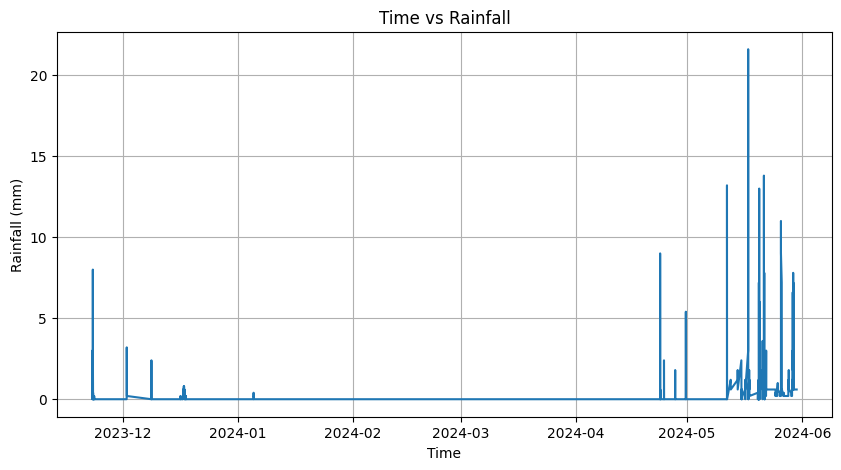

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(data['Time'], data['rainfall_mm'])
plt.xlabel("Time")
plt.ylabel("Rainfall (mm)")
plt.title("Time vs Rainfall")
plt.grid()
plt.show()

In [15]:
non_zero = data[data['rainfall_mm']>0]
max_data = non_zero.loc[non_zero['rainfall_mm'].idxmax(), 'Time'].date()
min_data = non_zero.loc[non_zero['rainfall_mm'].idxmin(), 'Time'].date()
print("max : ",max_data,"min:",min_data)

max :  2024-05-17 min: 2023-11-22


##  Task 2

In [16]:
data[['Time','audio_3_min_before']].head()

,Time,audio_3_min_before
0,2023-11-22 18:27:26,[/kaggle/input/rain-data-master-8k/rainfall_so...
1,2023-11-22 18:30:26,[/kaggle/input/rain-data-master-8k/rainfall_so...
2,2023-11-22 18:33:26,[/kaggle/input/rain-data-master-8k/rainfall_so...
3,2023-11-22 18:36:26,[/kaggle/input/rain-data-master-8k/rainfall_so...
4,2023-11-22 18:39:26,[/kaggle/input/rain-data-master-8k/rainfall_so...


In [17]:
def combine_audio(file_list):
    combined = []
    for f in sorted(file_list):
        y,_ = librosa.load(f,sr = None)
        combined.append(y)
    if combined:
        return np.concatenate(combined)
    else:
        return np.array([])

In [21]:
# for single row
# file_list = data.loc[0]['audio_3_min_before']
# combined_array = combine_audio(file_list)

# print('shape:',combined_array.shape)
combined_array = None
print(combined_array)

None


In [24]:
os.makedirs("combined_audio",exist_ok = True)
combined_paths = []
for idx,row in data.iterrows():
    file_list = row['audio_3_min_before']
    combined_array = combine_audio(file_list)

    save_path = f"combined_audio/combined_audio_{idx}.npy"
    np.save(save_path,combined_array)

    combined_paths.append(save_path)

data['combined_path'] = combined_paths
    

In [25]:
data.head()

,Time,device_frmpayload_data_rainfall,rainfall_mm,audio_3_min_before,combined_path
0,2023-11-22 18:27:26,800 µm,0.8,[/kaggle/input/rain-data-master-8k/rainfall_so...,combined_audio/combined_audio_0.npy
1,2023-11-22 18:30:26,1.40 mm,1.4,[/kaggle/input/rain-data-master-8k/rainfall_so...,combined_audio/combined_audio_1.npy
2,2023-11-22 18:33:26,1 mm,1.0,[/kaggle/input/rain-data-master-8k/rainfall_so...,combined_audio/combined_audio_2.npy
3,2023-11-22 18:36:26,1.40 mm,1.4,[/kaggle/input/rain-data-master-8k/rainfall_so...,combined_audio/combined_audio_3.npy
4,2023-11-22 18:39:26,200 µm,0.2,[/kaggle/input/rain-data-master-8k/rainfall_so...,combined_audio/combined_audio_4.npy


In [26]:
def extract_features(audio_array):
    features = {
        'mean' : np.mean(audio_array),
        'std' : np.std(audio_array),
        'max' : np.max(audio_array),
        'min': np.min(audio_array),
        'energy' : np.sum(audio_array**2)
    }
    return features

In [29]:
feature_rows = []
for idx,row in data.iterrows():
    audio_path = row['combined_path']
    audio_array = np.load(audio_path)
    if audio_array.size == 0:
        continue
    features = extract_features(audio_array)
    features['target'] = row['rainfall_mm']
    feature_rows.append(features)

prepro_df = pd.DataFrame(feature_rows)

In [30]:
prepro_df.head()

,mean,std,max,min,energy,target
0,-0.000015,0.016560,0.999969,-1.000000,394.910278,0.8
1,-0.000016,0.018940,0.854370,-0.996643,516.558105,1.4
2,-0.000012,0.013058,0.539978,-0.469696,245.536453,1.0
3,-0.000014,0.017015,0.905823,-0.848969,416.889282,1.4
4,-0.000016,0.005300,0.156769,-0.155762,38.208046,0.2


In [31]:
print(prepro_df.isnull().sum())

mean      0
std       0
max       0
min       0
energy    0
target    0
dtype: int64


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_only = prepro_df.drop('target',axis= 1)
scaled_features = scaler.fit_transform(features_only)

processed_final = pd.DataFrame(scaled_features,columns = features_only.columns)

processed_final['target'] = prepro_df['target'].values

In [40]:
processed_final

,mean,std,max,min,energy,target
0,-0.992745,0.599906,2.559055,-2.635544,0.219277,0.8
1,-1.163975,0.890109,2.027745,-2.623036,0.453429,1.4
2,-0.622576,0.172793,0.880490,-0.659707,-0.068242,1.0
3,-0.892444,0.655346,2.215503,-2.072822,0.261583,1.4
4,-1.149169,-0.773270,-0.517887,0.509967,-0.467314,0.2
...,...,...,...,...,...,...
1269,0.916172,-0.836655,-0.581570,0.516341,-0.481031,0.6
1270,0.686283,-0.814691,-0.651752,0.514744,-0.476438,0.6
1271,0.431676,-0.615576,0.759392,-0.744290,-0.420360,0.6
1272,0.958237,-0.727351,-0.543225,0.379567,-0.456495,0.6


In [41]:
processed_final.to_csv('final_prepro_rain_data.csv',index = False)